In [242]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [243]:
# Importing the Dataset
insurance_dataframe = pd.read_csv("/content/drive/MyDrive/Insurance_data.csv")

In [244]:
# Previewing the data
insurance_dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [245]:
# Getting the data info and its datatypes
insurance_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       178 non-null    int64  
 1   sex       178 non-null    object 
 2   bmi       178 non-null    float64
 3   children  178 non-null    int64  
 4   smoker    178 non-null    object 
 5   region    178 non-null    object 
 6   charges   178 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 9.9+ KB


In [246]:
# Getting the stats for the data
insurance_dataframe.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,178.000000,178,178.000000,178.000000,178,178,178.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,female,NaN,NaN,no,southwest,NaN
freq,NaN,93,NaN,NaN,135,46,NaN
mean,41.286517,NaN,30.788006,1.191011,NaN,NaN,14658.578256
std,13.411857,NaN,5.880850,1.256634,NaN,NaN,12715.668657
min,18.000000,NaN,16.815000,0.000000,NaN,NaN,1532.469700
25%,30.000000,NaN,26.600000,0.000000,NaN,NaN,5669.537575
50%,41.000000,NaN,30.350000,1.000000,NaN,NaN,10170.646525
75%,53.000000,NaN,35.172500,2.000000,NaN,NaN,19690.922935


In [247]:
# Check if there are any NAN data in the dataset
insurance_dataframe.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [248]:
# Check for any duplicated values in the dataset
insurance_dataframe.duplicated().any()

False

In [249]:
insurance_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
173,27,female,30.400,3,no,northwest,18804.75240
174,42,male,26.900,0,no,southwest,5969.72300
175,33,female,33.500,0,yes,southwest,37079.37200
176,62,female,38.095,2,no,northeast,15230.32405


In [250]:
# Checking the correlation between the columns
insurance_dataframe.corr().loc['charges']

<ipython-input-250-8edd2eeab2ff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance_dataframe.corr().loc['charges']


age         0.291895
bmi         0.226969
children    0.040319
charges     1.000000
Name: charges, dtype: float64

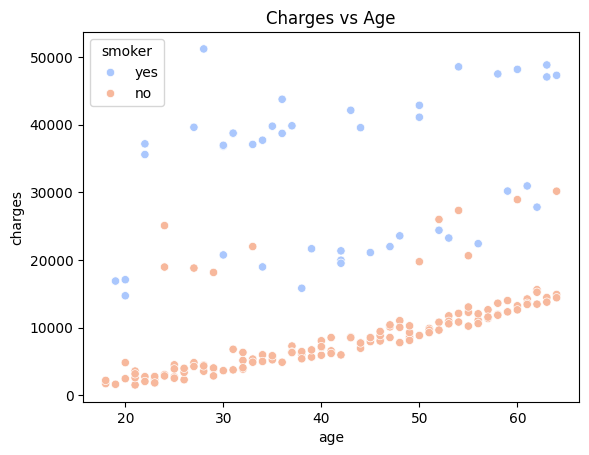

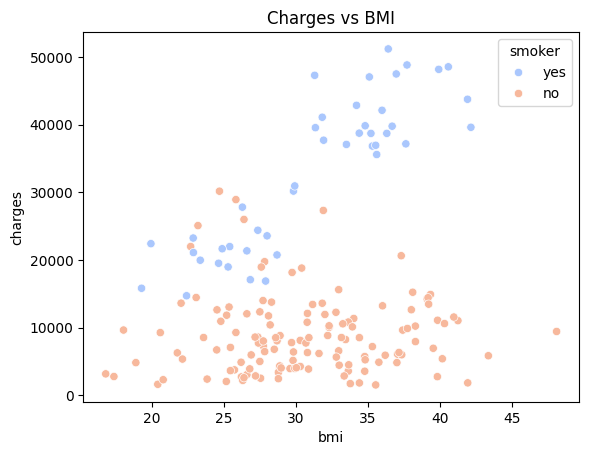

<ipython-input-251-b895fca19c9e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=insurance_dataframe, palette='coolwarm')


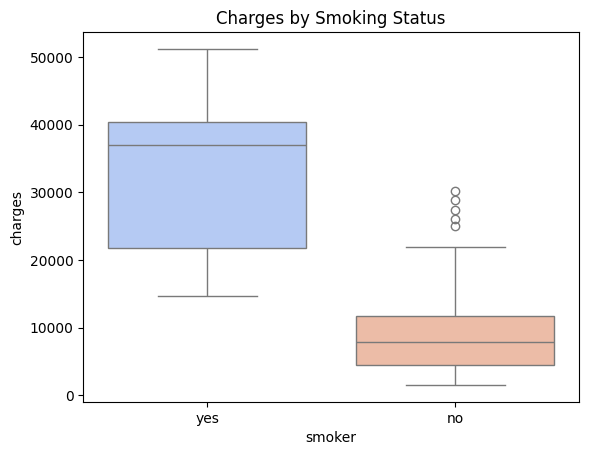

In [251]:
# Check the visuals of the data
sns.scatterplot(x='age', y='charges', data=insurance_dataframe, hue='smoker', palette='coolwarm')
plt.title('Charges vs Age')
plt.show()

sns.scatterplot(x='bmi', y='charges', data=insurance_dataframe, hue='smoker', palette='coolwarm')
plt.title('Charges vs BMI')
plt.show()

sns.boxplot(x='smoker', y='charges', data=insurance_dataframe, palette='coolwarm')
plt.title('Charges by Smoking Status')
plt.show()

In [257]:
# Creating a copy of the dataframe
insurance_dataframe_copy = insurance_dataframe.copy()

In [258]:
# Converting Categorical data to Numerical Form
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_dataframe = encoder.fit_transform(insurance_dataframe_copy[['sex','smoker','region']]).toarray()

# Get feature names from the encoder and create a DataFrame with these names
encoded_feature_names = encoder.get_feature_names_out(['sex','smoker','region'])
encoded_dataframe = pd.DataFrame(encoded_dataframe, columns=encoded_feature_names)
insurance_dataframe_copy = pd.concat([insurance_dataframe_copy, encoded_dataframe], axis=1)
insurance_dataframe_copy

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,27,female,30.400,3,no,northwest,18804.75240,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
174,42,male,26.900,0,no,southwest,5969.72300,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
175,33,female,33.500,0,yes,southwest,37079.37200,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
176,62,female,38.095,2,no,northeast,15230.32405,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [260]:
# Feature engineering
insurance_dataframe_copy['smoker_age_interaction'] = insurance_dataframe_copy['smoker_yes'] * insurance_dataframe_copy['age']
insurance_dataframe_copy['bmi_age_interaction'] = insurance_dataframe_copy['bmi'] * insurance_dataframe_copy['age']

In [261]:
# Check for the correlation
insurance_dataframe_copy.corr().loc['charges'].sort_values(ascending=False)

<ipython-input-261-34f31391bf8e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance_dataframe_copy.corr().loc['charges'].sort_values(ascending=False)


charges                   1.000000
smoker_yes                0.814320
smoker_age_interaction    0.803304
bmi_age_interaction       0.329734
age                       0.291895
bmi                       0.226969
sex_male                  0.183162
region_southwest          0.084969
region_southeast          0.045046
children                  0.040319
region_northeast         -0.043525
region_northwest         -0.088104
sex_female               -0.183162
smoker_no                -0.814320
Name: charges, dtype: float64

In [262]:
# Removing the unnecessary columns and basing to n−1 encoding for n categories
insurance_dataframe_copy.drop(columns=['sex', 'smoker', 'region', 'sex_female', 'region_southwest','region_southeast','region_northeast', 'region_northwest', 'smoker_no'], inplace=True, axis=1)
insurance_dataframe_copy


,age,bmi,children,charges,sex_male,smoker_yes,smoker_age_interaction,bmi_age_interaction
0,19,27.900,0,16884.92400,0.0,1.0,19.0,530.100
1,18,33.770,1,1725.55230,1.0,0.0,0.0,607.860
2,28,33.000,3,4449.46200,1.0,0.0,0.0,924.000
3,33,22.705,0,21984.47061,1.0,0.0,0.0,749.265
4,32,28.880,0,3866.85520,1.0,0.0,0.0,924.160
...,...,...,...,...,...,...,...,...
173,27,30.400,3,18804.75240,0.0,0.0,0.0,820.800
174,42,26.900,0,5969.72300,1.0,0.0,0.0,1129.800
175,33,33.500,0,37079.37200,0.0,1.0,33.0,1105.500
176,62,38.095,2,15230.32405,0.0,0.0,0.0,2361.890


In [263]:
# Assume X is your feature set and y is the target variable
y = insurance_dataframe_copy['charges']
X = insurance_dataframe_copy.drop(columns=['charges'])

In [264]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

In [265]:
# Linear Regression Model

# Initialize the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Training accuracy
train_accuracy = linear_model.score(X_train, y_train)
print('Training Accuracy: %.3f' %(train_accuracy * 100))

# Evaluate the model
test_accuracy = linear_model.score(X_test, y_test)
print('Test Accuracy: %.3f' %(test_accuracy * 100))

Training Accuracy: 79.469
Test Accuracy: 65.033


In [266]:
# Random Forest Regressor

# Initialize a Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': np.arange(1, 501, 100),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1, 'sqrt']
}

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=random_forest_model,
                                   param_distributions=param_distributions,
                                   n_iter=10, # Number of parameter settings sampled
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1, # Use all available cores
                                   random_state=42)

# Perform the Randomized Search with Cross-Validation
random_search.fit(X_train, y_train)

# Retrieve the best model from random search
best_model = random_search.best_estimator_

# Make predictions with the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error on the test set
r2_score_test = r2_score(y_test, y_pred)

# Report the performance
print(f"Best Model Parameters: {random_search.best_params_}")
print(f"R2 Score on the Test Set: {r2_score_test}")

Best Model Parameters: {'n_estimators': 301, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
R2 Score on the Test Set: 0.7946819508717502


In [267]:
# save the model to disk
model_filename = '/content/drive/MyDrive/finalized_model.sav'
pickle.dump(best_model, open(model_filename, 'wb'))

# save the encoder to disk
encoder_filename = '/content/drive/MyDrive/finalized_encoder.sav'
pickle.dump(encoder, open(encoder_filename, 'wb'))

In [276]:
loaded_model = pickle.load(open(model_filename, 'rb'))
loaded_encoder = pickle.load(open(encoder_filename, 'rb'))

def test_call(data_array):
  columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
  test_dataframe = pd.DataFrame([data_array], columns=columns)

  # encoding the categorical data
  encoded_dataframe = encoder.transform(test_dataframe[['sex','smoker','region']]).toarray()
  encoded_feature_names = encoder.get_feature_names_out(['sex','smoker','region'])

  # Get feature names from the encoder and create a DataFrame with these names
  encoded_dataframe = pd.DataFrame(encoded_dataframe, columns=encoded_feature_names)
  test_dataframe = pd.concat([test_dataframe, encoded_dataframe], axis=1)

  # Feature engineering
  test_dataframe['smoker_age_interaction'] = test_dataframe['smoker_yes'] * test_dataframe['age']
  test_dataframe['bmi_age_interaction'] = test_dataframe['bmi'] * test_dataframe['age']

  # Dropping irrelevant columns
  test_dataframe.drop(columns=['sex', 'smoker', 'region', 'sex_female', 'region_southwest','region_southeast','region_northeast', 'region_northwest', 'smoker_no'], inplace=True, axis=1)

  result = loaded_model.predict(test_dataframe)
  return result

In [278]:
test_call([19, 'female', 27.900, 0,	'yes', 'southwest'])[0]

16373.326608221227

In [280]:
# Actual value: 16884.92400